$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 3 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [134]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [362]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [285]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

C:\Users\Dina\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [3]:
train.shape

(100000, 28)

In [145]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

there are null values in columns['Name',' Monthly_Inhand_Salary','Type_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries'
                                 ,'Credit_History_Age','Amount_invested_monthly','Monthly_Balance']   


In [6]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


we must do scaling between these features

In [127]:
train['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

'Credit_Score' is imbalanced , we need to use parameter class_weight='balanced'

In [128]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

'Name' has 9985 null values ,but this column don't effect in output so we will drop it    
'Monthly_Inhand_Salary'  has 15002 null values , but 'Annual_Income' has the same information so we will drop it     
'Type_of_Loan'  has 11408 null values ,but this column don't effect in output so we will drop it    
'Num_of_Delayed_Payment' has 7002 null values  so, we will fill them by using 'mean'     
'Num_Credit_Inquiries' has 1965 null values  so, we will fill them by using 'mean'   
'Credit_History_Age' has 9030 null values  so, we will fill them by using 'mean'       
'Amount_invested_monthly' has 4479 null values  so, we will fill them by using 'mean'      
'Monthly_Balance' has 1200 null values  so, we will fill them by using 'mean'    

In [129]:
train.duplicated().sum()

0

In [130]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

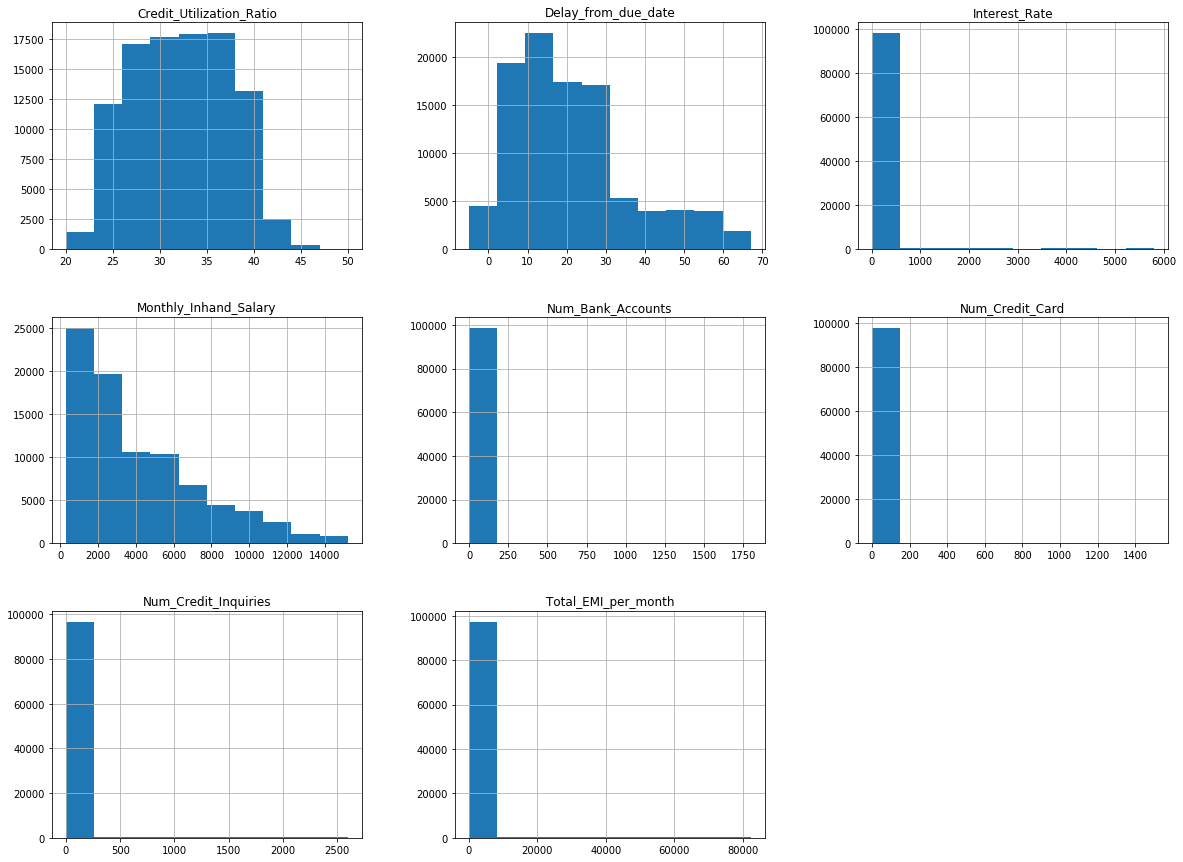

In [15]:
train.hist(figsize=(20,15));

'Credit_Utilization_Ratio' and 'Delay_from_due_date' have gaussian distribution  
'Monthly_Inhand_Salary' has right skewness distribution   
the rest of graph have small range between 0 to 500 almost 
so we need to do rescaling

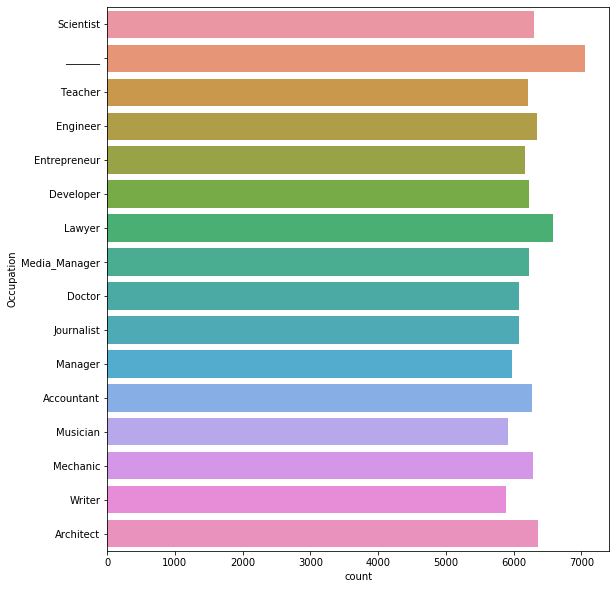

In [18]:
plt.figure(figsize=(9,10))
sns.countplot(y="Occupation",data=train);

There are approximately 7,000 classes that do not contain a Occupation  so we will drop them    
most customers are 'Lawyers' and 'Architect'

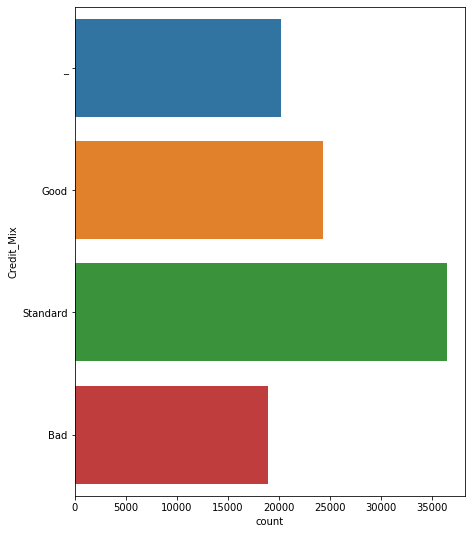

In [20]:
plt.figure(figsize=(7,9))
sns.countplot(y="Credit_Mix",data=train);

most Credit_Mix is Standard  
we need to drop '_' from this column 

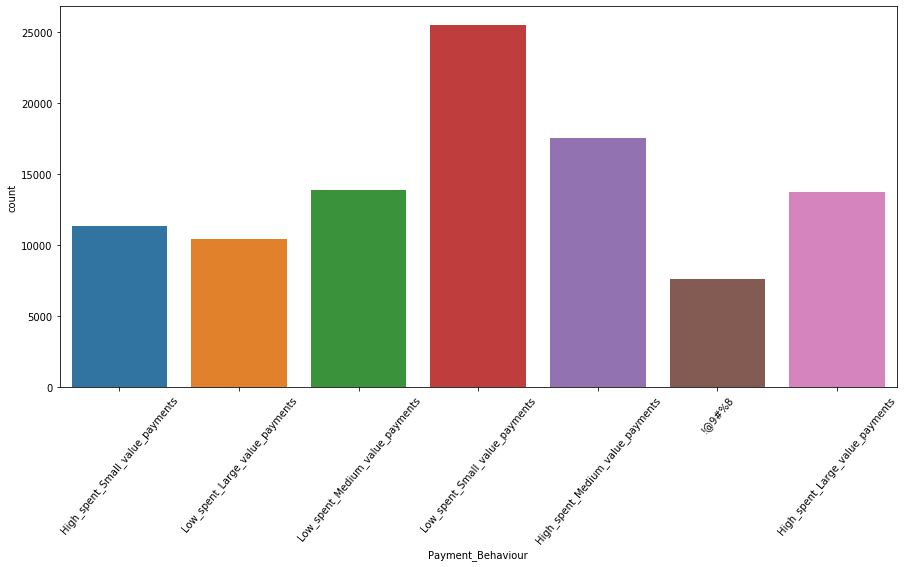

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x="Payment_Behaviour",data=train)
plt.xticks(rotation=50);

most Payment_Behaviour is Low_spent_Small_value_payments    
we need to replace "!@9#%8"to NAN

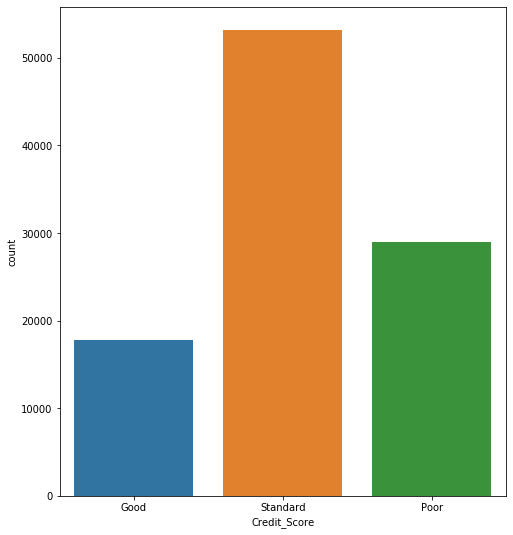

In [26]:
plt.figure(figsize=(8,9))
sns.countplot(x="Credit_Score",data=train);

most credit_score is Standard    
this column imbalance 

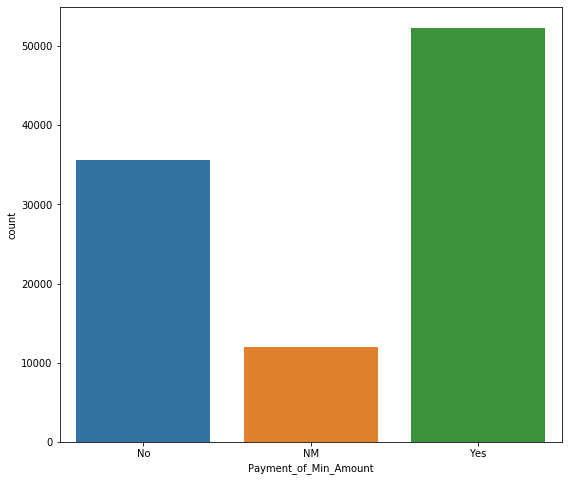

In [29]:
plt.figure(figsize=(9,8))
sns.countplot(x="Payment_of_Min_Amount",data=train);

most Payment_of_Min_Amount is Yes 

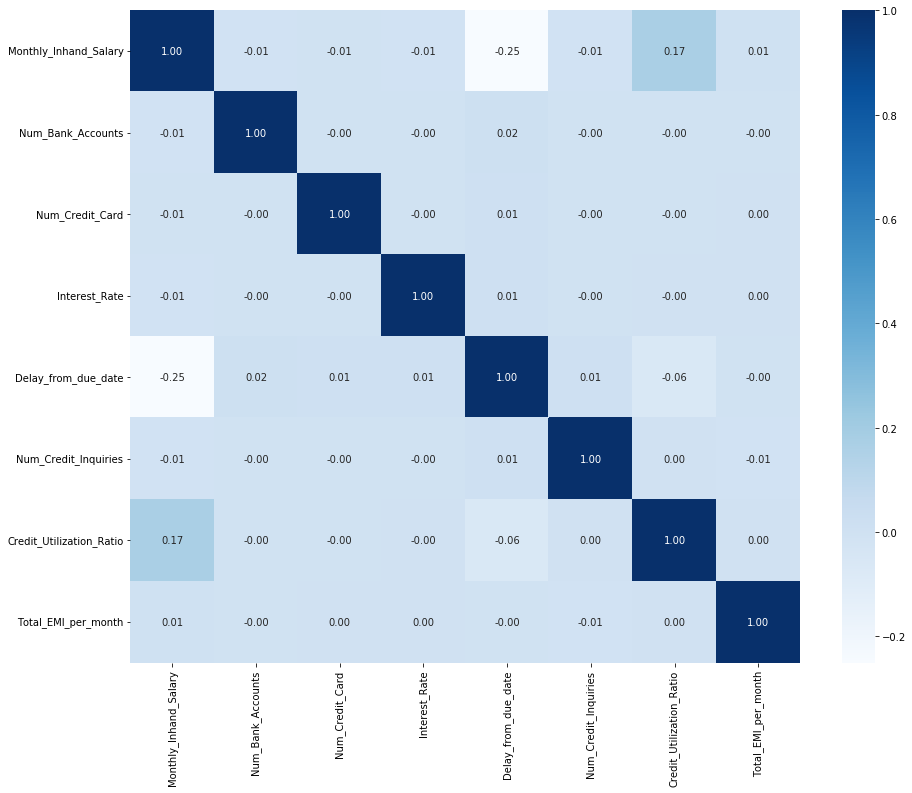

In [32]:
df_corr=train.select_dtypes(include=["float64","int64"]).corr()
plt.figure(figsize=(15,12))
sns.heatmap(df_corr,annot=True,cmap="Blues",fmt=".2f")

there are no correlation between these features

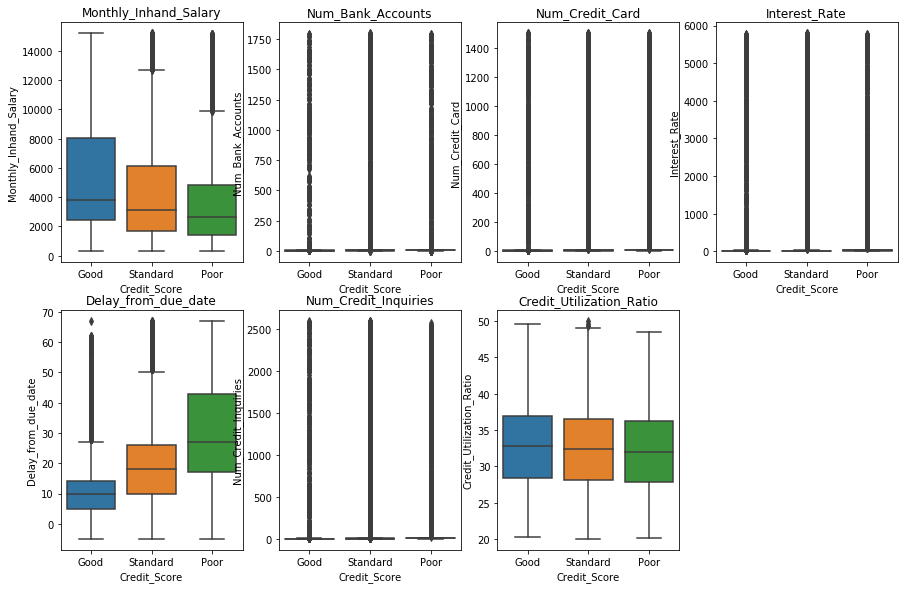

In [37]:
df_numeric=train.select_dtypes(include=["float64","int64"])
plt.figure(figsize=(15,15))
for ax, col in enumerate(df_numeric.columns[:-1]):
    plt.subplot(3,4, ax+1)
    plt.title(col)
    sns.boxplot(x="Credit_Score", y=col, data=train)
    

there are outliers

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hint: It could be helpful to check `sklearn.preprocessing` module.

In [286]:
train.drop(["ID","Customer_ID","Name","SSN","Monthly_Inhand_Salary","Type_of_Loan","Month"], axis=1, inplace=True)

In [288]:
train['Credit_History_Age'] = train['Credit_History_Age'].str.extract(r'(\d+)')

In [290]:
train["Credit_History_Age"] = pd.to_numeric(train["Credit_History_Age"], errors="coerce")

In [292]:
train["Credit_History_Age"] = train["Credit_History_Age"].values.reshape(-1, 1)

In [294]:
numeric_imputer = SimpleImputer(strategy='mean')
train["Credit_History_Age"] = numeric_imputer.fit_transform(train[["Credit_History_Age"]])

In [296]:
train['Credit_History_Age']

0        22.000000
1        17.966516
2        22.000000
3        22.000000
4        22.000000
           ...    
99995    31.000000
99996    31.000000
99997    31.000000
99998    31.000000
99999    31.000000
Name: Credit_History_Age, Length: 100000, dtype: float64

In [297]:
train.drop(train[train["Occupation"]=='_______'].index,inplace=True)

In [299]:
label_encoder = LabelEncoder()
train['Occupation'] = label_encoder.fit_transform(train['Occupation'])

In [301]:
train.drop(train[train["Credit_Mix"]=='_'].index,inplace=True)

In [303]:
train["Credit_Mix"] = label_encoder.fit_transform(train["Credit_Mix"])

In [305]:
train.drop(train[train["Payment_Behaviour"]=="!@9#%8"].index,inplace=True)

In [307]:
train["Payment_Behaviour"] = label_encoder.fit_transform(train["Payment_Behaviour"])

In [309]:
train["Credit_Score"] = label_encoder.fit_transform(train["Credit_Score"])

In [311]:
train["Payment_of_Min_Amount"] = label_encoder.fit_transform(train["Payment_of_Min_Amount"])

In [313]:
train.dropna(subset=["Payment_Behaviour"], inplace=True)

In [315]:
train["Monthly_Balance"] = pd.to_numeric(train["Monthly_Balance"], errors="coerce")

In [317]:
train["Monthly_Balance"] = train["Monthly_Balance"].values.reshape(-1, 1)

In [319]:
train["Monthly_Balance"] = numeric_imputer.fit_transform(train[["Monthly_Balance"]])

In [321]:
train["Amount_invested_monthly"] = pd.to_numeric(train["Amount_invested_monthly"], errors="coerce")
train["Amount_invested_monthly"] = train["Amount_invested_monthly"].values.reshape(-1, 1)
train["Amount_invested_monthly"] = numeric_imputer.fit_transform(train[["Amount_invested_monthly"]])

In [323]:
train["Num_Credit_Inquiries"] = numeric_imputer.fit_transform(train[["Num_Credit_Inquiries"]])

In [325]:
train["Num_of_Delayed_Payment"] = pd.to_numeric(train["Num_of_Delayed_Payment"], errors="coerce")
train["Num_of_Delayed_Payment"] = train["Num_of_Delayed_Payment"].values.reshape(-1, 1)
train["Num_of_Delayed_Payment"] = numeric_imputer.fit_transform(train[["Num_of_Delayed_Payment"]])

In [327]:
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace('_',np.nan)

In [329]:
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors="coerce")
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].values.reshape(-1, 1)
train['Changed_Credit_Limit'] = numeric_imputer.fit_transform(train[['Changed_Credit_Limit']])

In [331]:
train['Age']=train['Age'].replace('-500',np.nan)

In [333]:
train['Age'] = pd.to_numeric(train['Age'], errors="coerce")
train['Age'] = train['Age'].values.reshape(-1, 1)
train['Age'] = numeric_imputer.fit_transform(train[['Age']])

In [335]:
train["Annual_Income"] = pd.to_numeric(train["Annual_Income"], errors="coerce")
train["Annual_Income"] = train["Annual_Income"].values.reshape(-1, 1)
train["Annual_Income"] = numeric_imputer.fit_transform(train[["Annual_Income"]])

In [337]:
train["Num_of_Loan"] = pd.to_numeric(train["Num_of_Loan"], errors="coerce")
train["Num_of_Loan"] = train["Num_of_Loan"].values.reshape(-1, 1)
train["Num_of_Loan"] = numeric_imputer.fit_transform(train[["Num_of_Loan"]])

In [339]:
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [341]:
train['Delay_from_due_date'] = train['Delay_from_due_date'].abs()

In [343]:
columns_to_scale = ['Age', 'Annual_Income', 'Outstanding_Debt','Credit_Utilization_Ratio',
                    'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
scaler = StandardScaler()
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [344]:
train.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [345]:
X=train.drop("Credit_Score",axis=1)
y=train["Credit_Score"]

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [287]:
test.drop(["ID","Customer_ID","Name","SSN","Monthly_Inhand_Salary","Type_of_Loan","Month"], axis=1, inplace=True)

In [289]:
test['Credit_History_Age'] = test['Credit_History_Age'].str.extract(r'(\d+)')

In [291]:
test["Credit_History_Age"] = pd.to_numeric(test["Credit_History_Age"], errors="coerce")

In [293]:
test["Credit_History_Age"] = test["Credit_History_Age"].values.reshape(-1, 1)

In [295]:
test["Credit_History_Age"] = numeric_imputer.transform(test[["Credit_History_Age"]])

In [298]:
test.drop(test[test["Occupation"]=='_______'].index,inplace=True)

In [300]:
test['Occupation'] = label_encoder.transform(test['Occupation'])

In [302]:
test.drop(test[test["Credit_Mix"]=='_'].index,inplace=True)

In [304]:
test["Credit_Mix"] = label_encoder.transform(test["Credit_Mix"])

In [306]:
test.drop(test[test["Payment_Behaviour"]=="!@9#%8"].index,inplace=True)

In [308]:
test["Payment_Behaviour"] = label_encoder.transform(test["Payment_Behaviour"])

In [312]:
test["Payment_of_Min_Amount"] = label_encoder.transform(test["Payment_of_Min_Amount"])

In [314]:
test.dropna(subset=["Payment_Behaviour"], inplace=True)

In [316]:
test["Monthly_Balance"] = pd.to_numeric(test["Monthly_Balance"], errors="coerce")

In [318]:
test["Monthly_Balance"] = test["Monthly_Balance"].values.reshape(-1, 1)

In [320]:
test["Monthly_Balance"] = numeric_imputer.transform(test[["Monthly_Balance"]])

In [322]:
test["Amount_invested_monthly"] = pd.to_numeric(test["Amount_invested_monthly"], errors="coerce")
test["Amount_invested_monthly"] = test["Amount_invested_monthly"].values.reshape(-1, 1)
test["Amount_invested_monthly"] = numeric_imputer.transform(test[["Amount_invested_monthly"]])

In [324]:
test["Num_Credit_Inquiries"] = numeric_imputer.transform(test[["Num_Credit_Inquiries"]])

In [326]:
test["Num_of_Delayed_Payment"] = pd.to_numeric(test["Num_of_Delayed_Payment"], errors="coerce")
test["Num_of_Delayed_Payment"] = test["Num_of_Delayed_Payment"].values.reshape(-1, 1)
test["Num_of_Delayed_Payment"] = numeric_imputer.transform(test[["Num_of_Delayed_Payment"]])

In [328]:
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].replace('_',np.nan)

In [330]:
test['Changed_Credit_Limit'] = pd.to_numeric(test['Changed_Credit_Limit'], errors="coerce")
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].values.reshape(-1, 1)
test['Changed_Credit_Limit'] = numeric_imputer.transform(test[['Changed_Credit_Limit']])

In [332]:
test['Age']=test['Age'].replace('-500',np.nan)

In [334]:
test['Age'] = pd.to_numeric(test['Age'], errors="coerce")
test['Age'] = test['Age'].values.reshape(-1, 1)
test['Age'] = numeric_imputer.transform(test[['Age']])

In [336]:
test["Annual_Income"] = pd.to_numeric(test["Annual_Income"], errors="coerce")
test["Annual_Income"] = test["Annual_Income"].values.reshape(-1, 1)
test["Annual_Income"] = numeric_imputer.transform(test[["Annual_Income"]])

In [338]:
test["Num_of_Loan"] = pd.to_numeric(test["Num_of_Loan"], errors="coerce")
test["Num_of_Loan"] = test["Num_of_Loan"].values.reshape(-1, 1)
test["Num_of_Loan"] = numeric_imputer.transform(test[["Num_of_Loan"]])

In [340]:
test['Outstanding_Debt'] = pd.to_numeric(test['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [342]:
test['Delay_from_due_date'] = test['Delay_from_due_date'].abs()

In [346]:
test[columns_to_scale] = scaler.transform(test[columns_to_scale])

In [347]:
test.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

----------------------

# `05` Logistic Regression

Using `sklearn` implementation of logistic regression to model the data.

Hint: Look for `sklearn.linear_model.LogisticRegression` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- `random_state` $= 1234$

In [348]:
logreg = LogisticRegression(random_state=1234, penalty='none',class_weight='balanced',multi_class='ovr')

In [349]:
logreg.fit(X,y)

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(class_weight='balanced', multi_class='ovr', penalty='none',
                   random_state=1234)

In [350]:
y_cv_pred = cross_val_predict(logreg, X, y, cv=5,method='predict')

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [351]:
accuracy = accuracy_score(y, y_cv_pred)
precision = precision_score(y, y_cv_pred,average='weighted')
recall = recall_score(y, y_cv_pred,average='weighted')
f1 = f1_score(y, y_cv_pred,average='weighted')
conf_matrix = confusion_matrix(y, y_cv_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n",conf_matrix)

Accuracy: 0.5766
Precision: 0.6102
Recall: 0.5766
F1 Score: 0.5822
Confusion Matrix:
 [[ 8093   630  3460]
 [ 2481 12103  5273]
 [ 9502  7652 19294]]


Text(0.5, 1, 'Confusion Matrix')

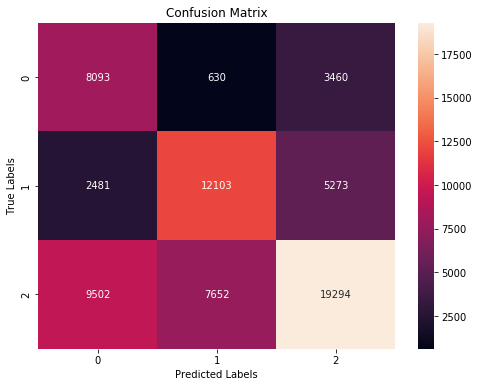

In [352]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

F1_score and confusion matrix are more reliable

## `iii` Regularization Mode: On

Let's try the default $l_2$ regularization. Use default $C$ parameter for simplicity. Does regularization make the model generalize better?

Which of the two regularizations performs better?

In [353]:
l2_logreg= LogisticRegression(random_state=1234, penalty='l2',class_weight='balanced',multi_class='ovr')
l2_logreg.fit(X,y)

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(class_weight='balanced', multi_class='ovr',
                   random_state=1234)

In [354]:
y_cv_pred = cross_val_predict(l2_logreg, X, y, cv=5,method='predict')

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [355]:
accuracy = accuracy_score(y, y_cv_pred)
precision = precision_score(y, y_cv_pred,average='weighted')
recall = recall_score(y, y_cv_pred,average='weighted')
f1 = f1_score(y, y_cv_pred,average='weighted')
conf_matrix = confusion_matrix(y, y_cv_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n",conf_matrix)

Accuracy: 0.5688
Precision: 0.6085
Recall: 0.5688
F1 Score: 0.5742
Confusion Matrix:
 [[ 8289   633  3261]
 [ 2591 12234  5032]
 [10218  7800 18430]]


Text(0.5, 1, 'Confusion Matrix')

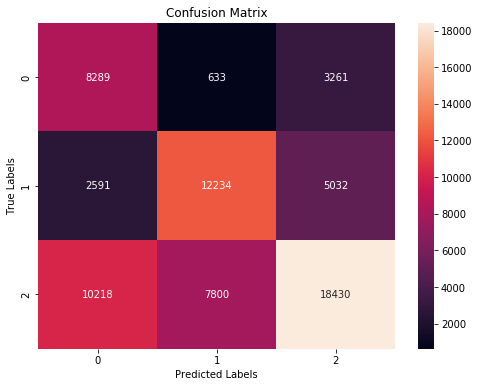

In [356]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

yes,regularization make the model generalize better    


## `iii` Tuning Hyperparameters

Try different `C` values and evaluate. What is the panalty value?

Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Note:` You can tune other parameters as you see fit (but make sure you elaborate your reasoning.

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [275]:
logreg = LogisticRegression( random_state=1234,solver='saga',class_weight='balanced',multi_class='ovr')


param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,1000,10000], 
    'penalty': ['l1', 'l2']
}


random_search = RandomizedSearchCV(
    logreg,
    param_distributions=param_dist,
    n_iter=12,  
    cv=5,  
    random_state=1234,
    n_jobs=-1
)

random_search.fit(X, y)


best_params = random_search.best_params_


print("Best Hyperparameters:", best_params)


C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Best Hyperparameters: {'penalty': 'l2', 'C': 0.001}


C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [276]:
y_cv_pred = cross_val_predict(random_search, X, y, cv=5,method='predict')

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\Dina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWar

In [277]:
accuracy = accuracy_score(y, y_cv_pred)
precision = precision_score(y, y_cv_pred,average='weighted')
recall = recall_score(y, y_cv_pred,average='weighted')
f1 = f1_score(y, y_cv_pred,average='weighted')
conf_matrix = confusion_matrix(y, y_cv_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n",conf_matrix)

Accuracy: 0.4930
Precision: 0.5252
Recall: 0.4930
F1 Score: 0.4942
Confusion Matrix:
 [[ 5595  2513  4075]
 [ 1870 12520  5467]
 [ 7525 13276 15647]]


Text(0.5, 1, 'Confusion Matrix')

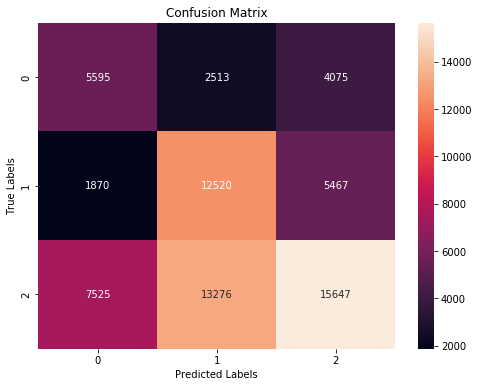

In [278]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

------------------

# `06` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [357]:
y_pred_test = l2_logreg.predict(test)

we don't have real y to calculate accuracy

-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

In [364]:
logreg = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(random_state=1234, penalty='l2', 
                                                                                   class_weight='balanced', multi_class='ovr'))])

y_cv_pred = cross_val_predict(logreg, X, y, cv=5, method='predict')

In [365]:
accuracy = accuracy_score(y, y_cv_pred)
precision = precision_score(y, y_cv_pred,average='weighted')
recall = recall_score(y, y_cv_pred,average='weighted')
f1 = f1_score(y, y_cv_pred,average='weighted')
conf_matrix = confusion_matrix(y, y_cv_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n",conf_matrix)

Accuracy: 0.6206
Precision: 0.6551
Recall: 0.6206
F1 Score: 0.6237
Confusion Matrix:
 [[10055   484  1644]
 [ 3266 11095  5496]
 [ 8031  7065 21352]]


Text(0.5, 1, 'Confusion Matrix')

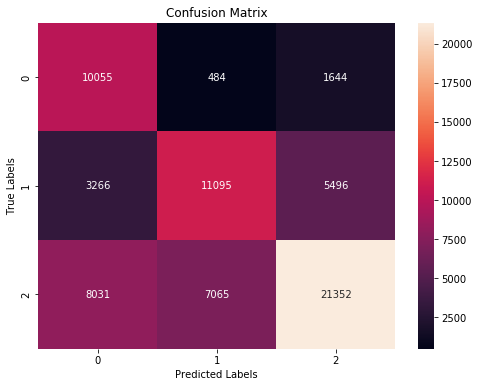

In [366]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$